# Libraries

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


## Autoencoder with Compression

In [ ]:
#Dataset
X, y = make_classification(n_samples = 1000, n_features = 100, n_informative = 10, n_redundant=90, random_state = 1)
print('Shape', X.shape)
X

Shape (1000, 100)


array([[ 5.83689773,  9.48106626, -5.92914747, ...,  5.37136211,
         5.7226078 ,  0.51555388],
       [-2.71781242, -5.68328851, -0.83430708, ...,  1.25532969,
        -6.67717369, -2.55389057],
       [-4.02714469, -0.71286757, -0.45087055, ..., -3.09433131,
         2.16707373, -5.38783486],
       ...,
       [-3.07304165, -0.74848055, -3.53713731, ...,  2.02834985,
         3.57109914, -3.42184247],
       [ 2.58697636,  8.45582302, -4.84465771, ...,  4.36163077,
         5.75076495,  3.11705391],
       [ 1.72207094,  2.74765656,  3.68745793, ...,  3.03883854,
         3.03021905, -1.85702062]])

In [ ]:
n_inputs = X.shape[1] # Number of inputs

In [ ]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [ ]:
#Scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

### Encoder

In [ ]:
visible = Input(shape = (n_inputs,))
#Define Encoder
#level 1
e = Dense(n_inputs*2)(visible) # e = encoder
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# level 2 
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

#Bottleneck 
n_bottleneck = round(float(n_inputs)/2.0)
bottleneck = Dense(n_bottleneck)(e)

# Define Decoder
#level 1
d = Dense(n_inputs)(bottleneck) # d = dencoder
d = BatchNormalization()(d)
d = LeakyReLU()(d)

#level 2
d = Dense(n_inputs*2)(d) # d = dencoder
d = BatchNormalization()(d)
d = LeakyReLU()(d)

#Output layer
output = Dense(n_inputs, activation = 'linear')(d)

#Define autoencoder model
model = Model(inputs = visible, outputs = output)

#compile autoencoder
model.compile(optimizer = 'adam', loss = 'mse')

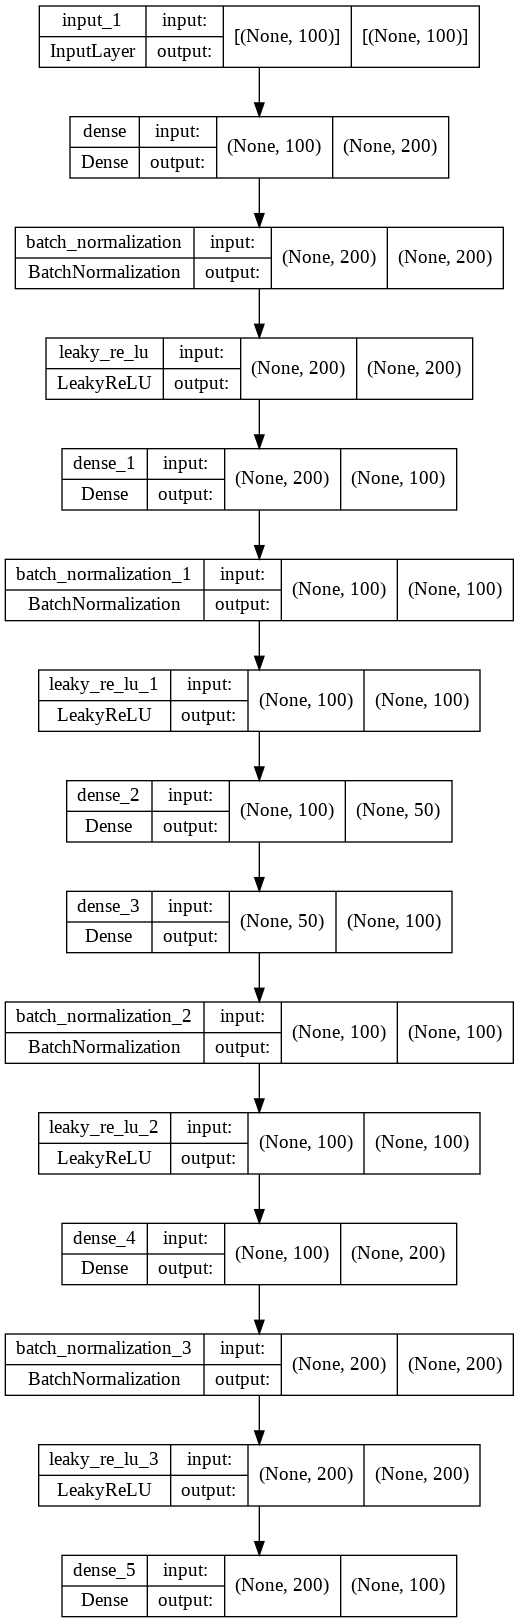

In [ ]:
plot_model(model, 'autoencoder_compress.png', show_shapes = True)

In [ ]:
# Fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs = 200, batch_size = 16, verbose = 2, validation_data = (X_test,X_test))

Epoch 1/200
42/42 - 7s - loss: 0.2384 - val_loss: 0.1801 - 7s/epoch - 165ms/step
Epoch 2/200
42/42 - 0s - loss: 0.0399 - val_loss: 0.1063 - 330ms/epoch - 8ms/step
Epoch 3/200
42/42 - 0s - loss: 0.0249 - val_loss: 0.0589 - 353ms/epoch - 8ms/step
Epoch 4/200
42/42 - 0s - loss: 0.0196 - val_loss: 0.0307 - 338ms/epoch - 8ms/step
Epoch 5/200
42/42 - 0s - loss: 0.0170 - val_loss: 0.0209 - 346ms/epoch - 8ms/step
Epoch 6/200
42/42 - 0s - loss: 0.0146 - val_loss: 0.0148 - 351ms/epoch - 8ms/step
Epoch 7/200
42/42 - 0s - loss: 0.0130 - val_loss: 0.0118 - 344ms/epoch - 8ms/step
Epoch 8/200
42/42 - 0s - loss: 0.0126 - val_loss: 0.0098 - 341ms/epoch - 8ms/step
Epoch 9/200
42/42 - 0s - loss: 0.0115 - val_loss: 0.0085 - 348ms/epoch - 8ms/step
Epoch 10/200
42/42 - 0s - loss: 0.0112 - val_loss: 0.0067 - 341ms/epoch - 8ms/step
Epoch 11/200
42/42 - 0s - loss: 0.0101 - val_loss: 0.0055 - 349ms/epoch - 8ms/step
Epoch 12/200
42/42 - 0s - loss: 0.0103 - val_loss: 0.0060 - 344ms/epoch - 8ms/step
Epoch 13/200
4

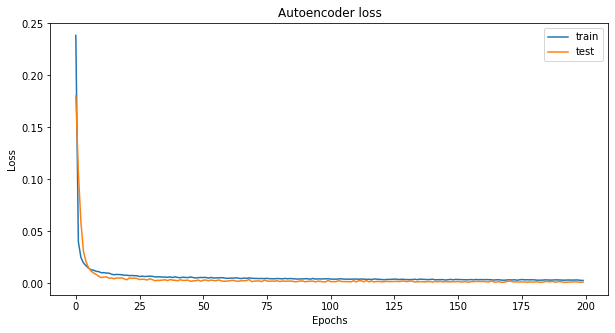

In [ ]:
#Plot Loss
fig, ax = plt.subplots(figsize=(10,5)) 
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.title('Autoencoder loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Autoencoderloss.png')

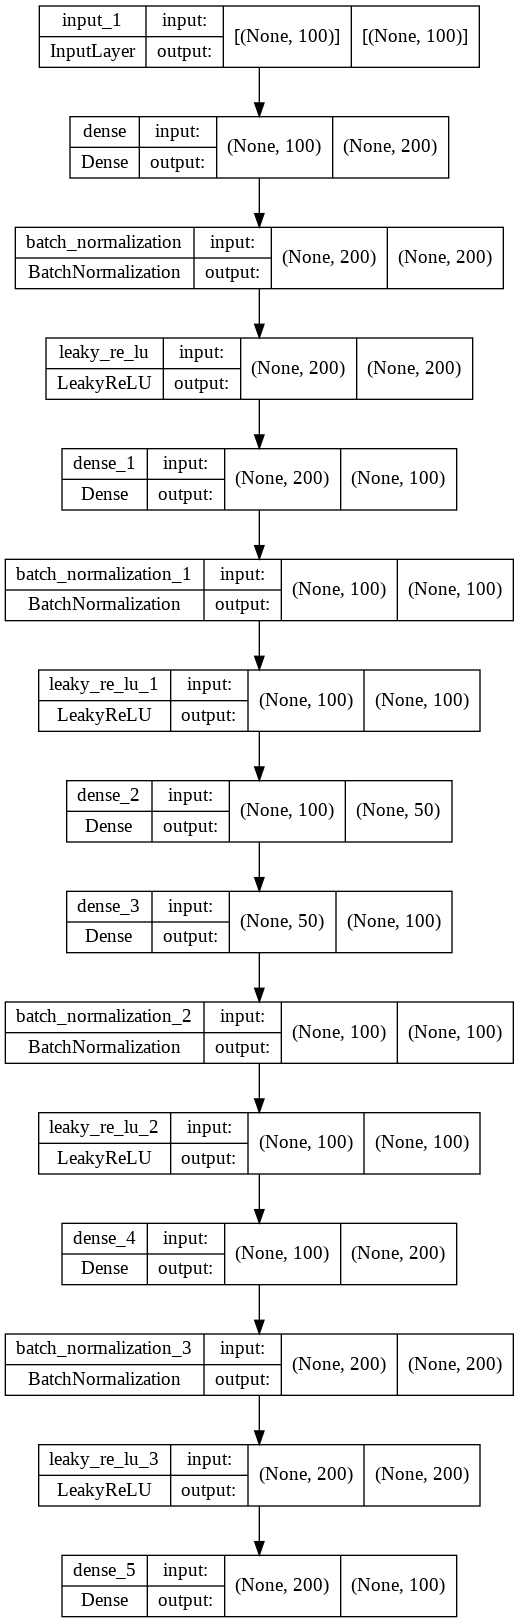

In [ ]:
#Define an encoder model without the decoder
encoder = Model(inputs =visible, outputs = bottleneck)
plot_model(model, 'encoder_compress.png', show_shapes = True)

In [14]:
# Save model
encoder.save('encoder.h5')

### Baseline Logisticregression

In [15]:
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8939393939393939


In [16]:
# load the model from file
encoder = load_model('encoder.h5')

In [17]:
# encode the  data
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)

In [18]:
model_encode = LogisticRegression()
# fit the model on the training set
model_encode.fit(X_train_encode, y_train)
# make predictions on the test set
y_pred_encode = model_encode.predict(X_test_encode)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:
acc_encode = accuracy_score(y_test, y_pred_encode)
print(acc_encode)

0.9242424242424242


In [23]:
print('Accuracy LogisticRegression Simple: {}'.format(acc))
print('Accuracy LogisticRegression With Autoencoder: {}'.format(acc_encode))

Accuracy LogisticRegression Simple: 0.8939393939393939
Accuracy LogisticRegression With Autoencoder: 0.9242424242424242
